_Ilhem OUASSINI , I2-APP RS1_

__Dans ce notebook, vous trouverez le code, les commentaires, ainsi que les résultats obtenus. Le rapport "Lab_3_classification_OUASSINI" fournit une analyse détaillée et une interprétation approfondie de ces résultats.__

# Lab 3 : Classification avec la Régression Logistique, KNN, et MLP sur le dataset NSL-KDD

## 1. Download and Load the NSL-KDD Dataset

In [5]:
import pandas as pd
# Charger les ensembles de données d'entraînement et de test NSL-KDD
column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level']) # Add the 43 column names from the NSL-KDD dataset
# Lire le fichier d'entraînement 'KDDTrain+.txt' sans en-tête, en utilisant les noms de colonnes spécifiés
train_df = pd.read_csv('KDDTrain+.txt', header=None, names=column_names)
# Lire le fichier de test 'KDDTest+.txt' sans en-tête, en utilisant les noms de colonnes spécifiés
test_df = pd.read_csv('KDDTest+.txt', header=None, names=column_names)
train_df
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


Le résultat montre un extrait du DataFrame train_df où chaque ligne représente une connexion réseau avec diverses caractéristiques et une étiquette indiquant si la connexion est normale ou une attaque, utilisé pour l'apprentissage des modèles de machine learning.

In [7]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [8]:
print(train_df.columns)  # Afficher les noms des colonnes du DataFrame d'entraînement
print(test_df.columns)   # Afficher les noms des colonnes du DataFrame de test

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome', 'level'],
      dtype='object')
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       

In [9]:
Results = set(train_df['outcome'].values)
print(Results,end=" ")

{'phf', 'spy', 'pod', 'imap', 'warezclient', 'teardrop', 'buffer_overflow', 'neptune', 'perl', 'land', 'warezmaster', 'portsweep', 'smurf', 'normal', 'multihop', 'rootkit', 'guess_passwd', 'ipsweep', 'nmap', 'ftp_write', 'loadmodule', 'satan', 'back'} 

In [10]:
# Transformer les valeurs de la colonne 'outcome' en valeurs binaires :
# Attribuer 0 si l'étiquette est 'normal', sinon attribuer 1
Trained_attack = train_df.outcome.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = test_df.outcome.map(lambda a: 0 if a == 'normal' else 1)
# Ajouter la colonne 'classification' au DataFrame d'entraînement avec les valeurs transformées
train_df['classification'] = Trained_attack
# Ajouter la colonne 'classification' au DataFrame de test avec les valeurs transformées
test_df['classification'] = Tested_attack

Le code transforme les valeurs de la colonne 'outcome' en valeurs binaires (0 pour 'normal' et 1 pour les anomalies) et ajoute ces valeurs transformées dans une nouvelle colonne 'classification' dans les DataFrames d'entraînement et de test.

In [12]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,classification
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,0
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1


In [13]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,classification
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,0
22540,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,0
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15,1
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21,0


In [14]:
#%pip install ydata-profiling

In [15]:
#pip install ipywidgets

In [16]:
#%pip install ydata-profiling
#%pip install pandas
#%pip install ipywidgets
#%pip install --upgrade jupyter ipywidgets

In [17]:
from ydata_profiling import ProfileReport
# Crée un rapport de profilage pour le DataFrame 'train_df'
profile = ProfileReport(train_df, title="Lab 3", explorative=True)
# Enregistre le rapport de profilage dans un fichier HTML nommé "Lab3Report.html"
profile.to_file("Lab3Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
from sklearn.preprocessing import LabelEncoder
# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()
# Encoder les valeurs de la colonne 'outcome' dans l'ensemble d'entraînement et ajouter une nouvelle colonne 'label'
train_df['label'] = label_encoder.fit_transform(train_df['outcome'])
# Encoder les valeurs de la colonne 'outcome' dans l'ensemble de test en utilisant le même encodage et ajouter une nouvelle colonne 'label'
test_df['label'] = label_encoder.fit_transform(test_df['outcome'])

Le code convertit les valeurs catégorielles de la colonne outcome en valeurs numériques dans les ensembles d'entraînement et de test, et les stocke dans une nouvelle colonne label.

## 2. Data Preprocessing

### 1. Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder pour chaque colonne catégorielle
label_encoder = LabelEncoder()

# Encoder les colonnes dans l'ensemble d'entraînement
train_df['protocol_type'] = label_encoder.fit_transform(train_df['protocol_type'])
train_df['service'] = label_encoder.fit_transform(train_df['service'])
train_df['flag'] = label_encoder.fit_transform(train_df['flag'])

# Encoder les colonnes dans l'ensemble de test en utilisant les mêmes encodages
test_df['protocol_type'] = label_encoder.fit_transform(test_df['protocol_type'])
test_df['service'] = label_encoder.fit_transform(test_df['service'])
test_df['flag'] = label_encoder.fit_transform(test_df['flag'])

# Afficher les DataFrames modifiés
train_df
test_df


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,classification,label
0,0,1,45,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1,14
1,0,1,45,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1,14
2,2,1,19,9,12983,0,0,0,0,0,...,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0,16
3,0,0,13,9,20,0,0,0,0,0,...,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1,24
4,1,1,55,2,0,15,0,0,0,0,...,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,0,16
22540,0,1,22,9,317,938,0,0,0,0,...,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,0,16
22541,0,1,22,9,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.0,0.07,0.07,back,15,1,1
22542,0,2,11,9,42,42,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,normal,21,0,16


In [23]:
print(train_df.columns)  # Afficher les noms des colonnes du DataFrame d'entraînement
print(test_df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome', 'level', 'classification',
       'label'],
      dtype='object')
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_f

In [24]:
# Supprime la colonne 'outcome' des ensembles de données d'entraînement et de test
train_df = train_df.drop(columns=['outcome'])
test_df = test_df.drop(columns=['outcome'])

### 2. Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Définir les caractéristiques (features) et la cible (target)
X_train = train_df.drop(columns=[ 'land', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 
                    'count', 'srv_count', 'num_failed_logins', 'num_compromised', 'num_root', 
                    'num_file_creations', 'num_shells', 'num_access_files'])

y_train = train_df['classification']

X_test = test_df.drop(columns=[ 'land', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 
                    'count', 'srv_count', 'num_failed_logins', 'num_compromised', 'num_root', 
                    'num_file_creations', 'num_shells', 'num_access_files'])

y_test = test_df['classification']

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
print(train_df.columns)  # Afficher les noms des colonnes du DataFrame d'entraînement
print(test_df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level', 'classification', 'label'],
      dtype='object')
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent'

In [28]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,classification,label
0,0,1,45,1,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21,1,14
1,0,1,45,1,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21,1,14
2,2,1,19,9,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21,0,16
3,0,0,13,9,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15,1,24
4,1,1,55,2,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.0,0.00,0.00,21,0,16
22540,0,1,22,9,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.0,0.00,0.00,21,0,16
22541,0,1,22,9,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.0,0.07,0.07,15,1,1
22542,0,2,11,9,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.0,0.00,0.00,21,0,16


In [29]:
print(train_df.columns)  # Afficher les noms des colonnes du DataFrame d'entraînement
print(test_df.columns)   # Afficher les noms des colonnes du DataFrame de test

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level', 'classification', 'label'],
      dtype='object')
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent'

In [30]:
train_df.protocol_type.value_counts()

protocol_type
1    102689
2     14993
0      8291
Name: count, dtype: int64

In [31]:
test_df.protocol_type.value_counts()

protocol_type
1    18880
2     2621
0     1043
Name: count, dtype: int64

In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  int32  
 2   service                      22544 non-null  int32  
 3   flag                         22544 non-null  int32  
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

### 3. Feature Selection (Optional)

Le PCA (Analyse en Composantes Principales) sert à réduire la dimensionnalité des données tout en conservant le maximum d'information. Cela simplifie les données en réduisant le nombre de variables tout en éliminant les redondances.

In [35]:
from sklearn.decomposition import PCA

# Standardiser les données avant d'appliquer PCA
scaler = StandardScaler() # Crée une instance de StandardScaler pour normaliser les données
X_train_scaled = scaler.fit_transform(X_train) # Applique la normalisation sur les données d'entraînement
X_test_scaled = scaler.transform(X_test) # Applique la même normalisation sur les données de test

# Appliquer PCA pour réduire les dimensions
pca = PCA(n_components=10)  # Crée une instance de PCA pour réduire les dimensions à 10 composantes principales
X_train_pca = pca.fit_transform(X_train_scaled) # Entraîne la PCA sur les données d'entraînement et transforme ces données
X_test_pca = pca.transform(X_test_scaled) # Transforme les données de test en utilisant la PCA déjà entraînée

# Afficher la variance expliquée par chaque composante principale
print(pca.explained_variance_ratio_) # Affiche la proportion de la variance expliquée par chaque composante principale

# Afficher la variance totale expliquée
print("Variance totale expliquée par les 10 premières composantes:", sum(pca.explained_variance_ratio_))  # Affiche la somme de la variance expliquée par les 10 premières composantes principales

[0.25071673 0.16506219 0.07579225 0.06255016 0.05162083 0.03755081
 0.03448776 0.03393825 0.03125611 0.03057025]
Variance totale expliquée par les 10 premières composantes: 0.773545354666081


## 3. Logistic Regression

### 3.1. Train the Logistic Regression Model on the data
### 3.2. Make Predictions and Evaluate the Model

In [38]:
print(train_df['classification'].value_counts())
print(test_df['classification'].value_counts())

classification
0    67343
1    58630
Name: count, dtype: int64
classification
1    12833
0     9711
Name: count, dtype: int64


In [39]:
# okok
#X_train = train_df.drop(columns=['classification'])
#y_train = train_df['classification']
#X_test = test_df.drop(columns=['classification'])
#y_test = test_df['classification']


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Créer une instance du modèle de régression logistique
log_reg = LogisticRegression(solver='liblinear',max_iter=10000,random_state=42)
# Entraîner le modèle avec les données d'entraînement
log_reg.fit(X_train, y_train)
# Faire des prédictions sur les données de test
y_pred = log_reg.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
# Générer le rapport de classification
report = classification_report(y_test, y_pred)
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
# Afficher la précision du modèle
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher le rapport de classification
print("Rapport de classification :\n", report)
# Afficher la matrice de confusion
print("Matrice de confusion :\n", conf_matrix)


Précision du modèle : 0.74
Rapport de classification :
               precision    recall  f1-score   support

           0       0.64      0.92      0.75      9711
           1       0.91      0.60      0.72     12833

    accuracy                           0.74     22544
   macro avg       0.77      0.76      0.74     22544
weighted avg       0.79      0.74      0.73     22544

Matrice de confusion :
 [[8927  784]
 [5130 7703]]


## 4. K-Nearest Neighbors (KNN)

### 4.1. Train the KNN Model
### 4.2. Make Predictions and Evaluate the Mode

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Créer l'instance du modèle KNN
knn = KNeighborsClassifier(n_neighbors=100)  # Vous pouvez ajuster le nombre de voisins si nécessaire

# Entraîner le modèle
knn.fit(X_train_scaled, y_train)  # Utilisez X_train_scaled car KNN est sensible à l'échelle des données

# Faire des prédictions
y_pred_knn = knn.predict(X_test_scaled)  # Utilisez X_test_scaled pour les prédictions

# Évaluer le modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

conf_matrix = confusion_matrix(y_test, y_pred_knn)

print(f"Précision du modèle KNN : {accuracy_knn:.2f}")
print("Rapport de classification KNN :\n", report_knn)
print("Matrice de confusion :\n", conf_matrix)

Précision du modèle KNN : 0.97
Rapport de classification KNN :
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      9711
           1       0.98      0.97      0.97     12833

    accuracy                           0.97     22544
   macro avg       0.97      0.97      0.97     22544
weighted avg       0.97      0.97      0.97     22544

Matrice de confusion :
 [[ 9410   301]
 [  412 12421]]


## 5. Multi-Layer Perceptron (MLP)

### 5.1.Train the MLP Model
### 5.2 Make Predictions and Evaluate the Model

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Créer l'instance du modèle MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)  # Ajustez les hyperparamètres si nécessaire

# Entraîner le modèle
mlp.fit(X_train_scaled, y_train)  # Utilisez X_train_scaled car MLP est sensible à l'échelle des données

# Faire des prédictions
y_pred_mlp = mlp.predict(X_test_scaled)  # Utilisez X_test_scaled pour les prédictions

# Évaluer le modèle
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
report_mlp = classification_report(y_test, y_pred_mlp)
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

print(f"Précision du modèle MLP : {accuracy_mlp:.2f}")
print("Rapport de classification MLP :\n", report_mlp)
print("Matrice de confusion :\n", conf_matrix)

Précision du modèle MLP : 1.00
Rapport de classification MLP :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           1       1.00      1.00      1.00     12833

    accuracy                           1.00     22544
   macro avg       1.00      1.00      1.00     22544
weighted avg       1.00      1.00      1.00     22544

Matrice de confusion :
 [[ 9668    43]
 [    0 12833]]


## 6. Model Comparison

### 6.1. Compare Performance

In [49]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher la précision de chaque modèle
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"MLP Accuracy: {accuracy_mlp:.2f}")

# Afficher les rapports de classification pour chaque modèle
print("Logistic Regression Classification Report:\n", report)
print("KNN Classification Report:\n", report_knn)
print("MLP Classification Report:\n", report_mlp)


Logistic Regression Accuracy: 0.74
KNN Accuracy: 0.97
MLP Accuracy: 1.00
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.92      0.75      9711
           1       0.91      0.60      0.72     12833

    accuracy                           0.74     22544
   macro avg       0.77      0.76      0.74     22544
weighted avg       0.79      0.74      0.73     22544

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      9711
           1       0.98      0.97      0.97     12833

    accuracy                           0.97     22544
   macro avg       0.97      0.97      0.97     22544
weighted avg       0.97      0.97      0.97     22544

MLP Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           1       1.00      1.00      1.00     12833

    accur

### 6.2. Confusion Matrix

In [51]:
%matplotlib inline


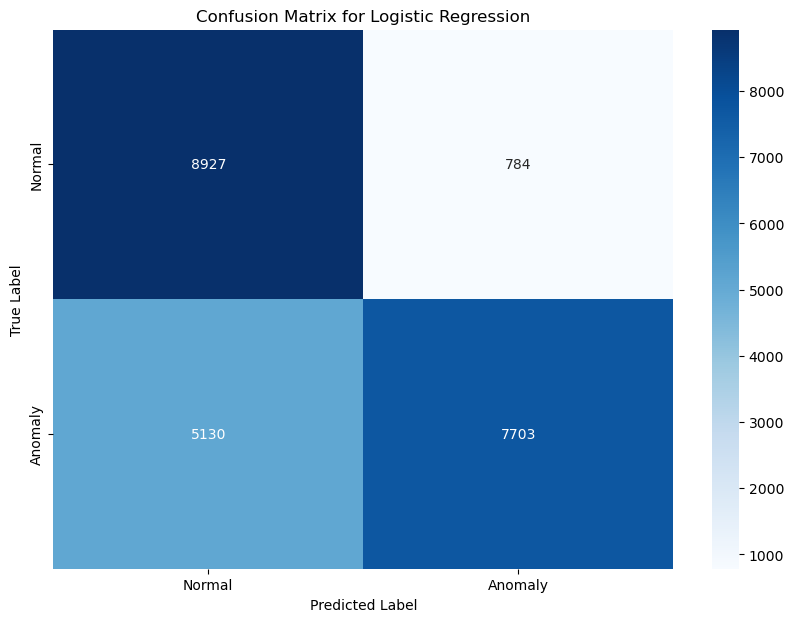

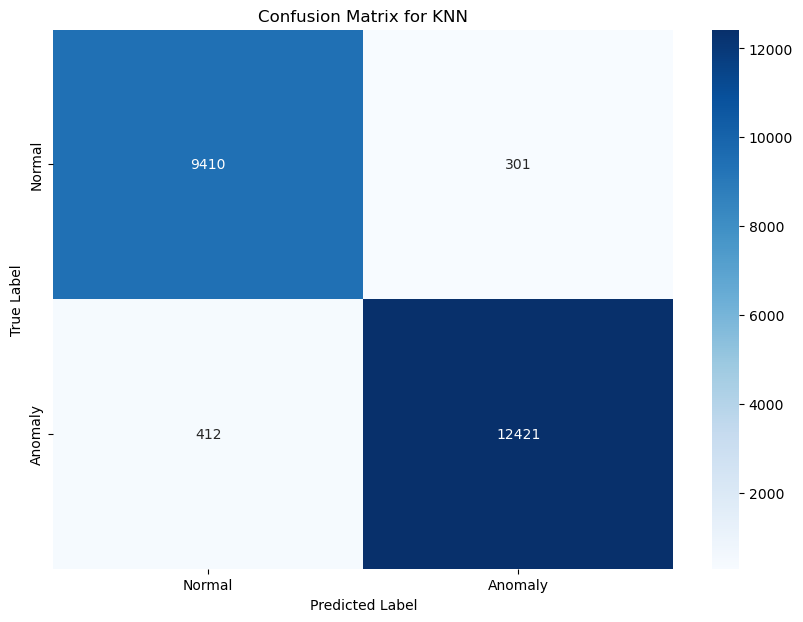

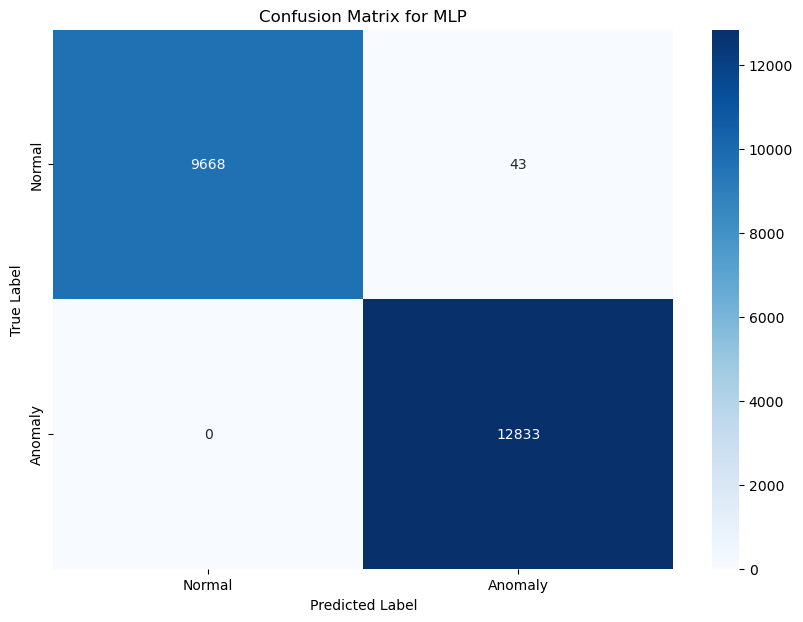

In [52]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Anomaly'], 
                yticklabels=['Normal', 'Anomaly'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Matrices de confusion pour chaque modèle
cm_lr = confusion_matrix(y_test, y_pred)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Afficher les matrices de confusion
plot_confusion_matrix(cm_lr, "Logistic Regression")
plot_confusion_matrix(cm_knn, "KNN")
plot_confusion_matrix(cm_mlp, "MLP")
